# K-Means

TODO: def

### Importing the dataset

In [277]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [278]:
dataset = pd.read_csv("./filez/Mall_Customers.csv")
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### EDA

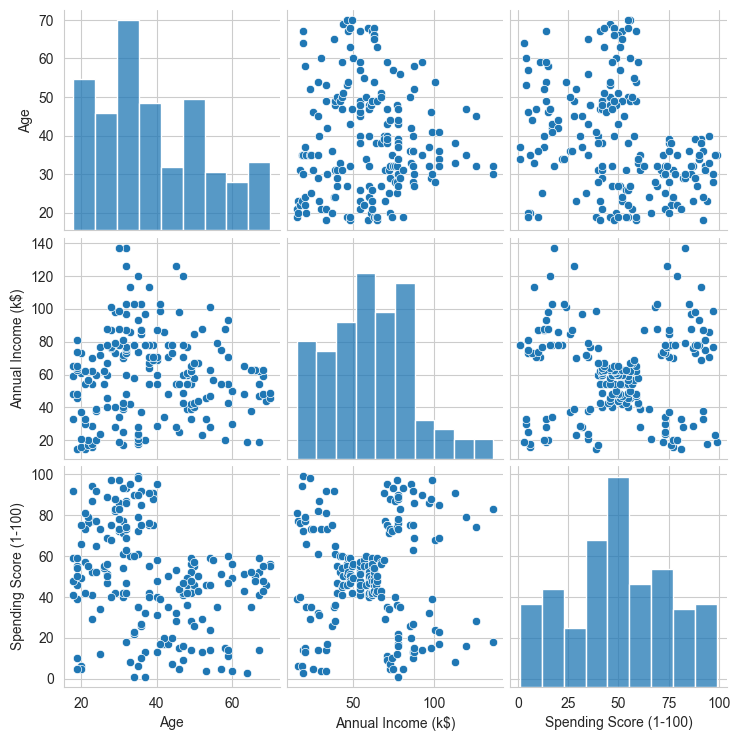

In [279]:
sns.pairplot(data=dataset.drop('CustomerID', axis=1))

### Data preprocessing

In [280]:
# convert categorical field 'Genre' to numerical
dataset["Genre"] = dataset["Genre"].map({"Male": 1, "Female": 0})
dataset.drop('CustomerID', axis=1, inplace=True)
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Elbow method to find the optimal # of clusters
Inclulding all features

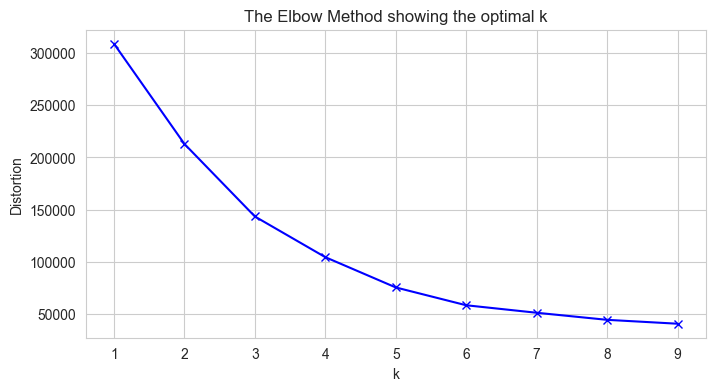

In [281]:
from sklearn.cluster import KMeans

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(dataset)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()

### Elbow method v2
Including only two features (for educational purposes), to visualize it in 2D (but should be done with all features)

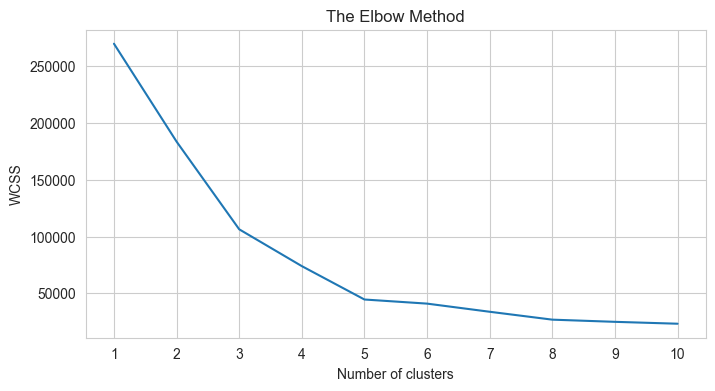

In [282]:
wcss = []
K = range(1, 11)
dataset2 = dataset[["Annual Income (k$)", "Spending Score (1-100)"]]
for i in K:
    ## KMeans++ : avoid random initialisation by setting the `init` param
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init="auto", random_state=42).fit(
        dataset2
    )
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.xticks(K)
plt.show()

### Training the K-Means model on the dataset

In [283]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init="k-means++", n_init="auto", random_state=42).fit(
    dataset2
)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 'auto',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [284]:
dataset2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [285]:
# creates a dependent var from training the model with 5 clusters
y_kmeans = kmeans.fit_predict(dataset2)
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### Visualising the clusters

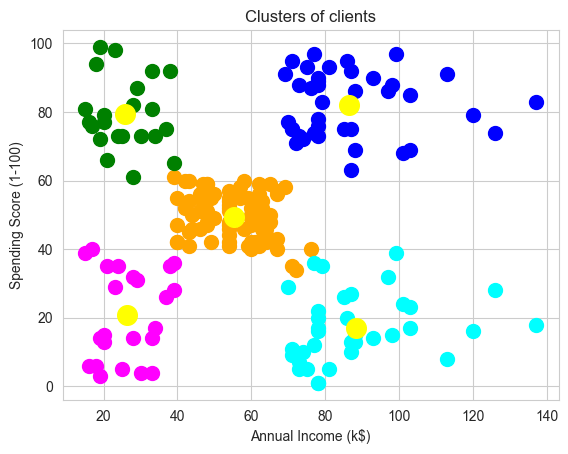

In [286]:
# scatter plot for each cluster
# @dev: dataset2 is a DataFrame and y_kmeans is a list
plt.scatter(
    x=dataset2.iloc[y_kmeans == 0, 0],
    y=dataset2.iloc[y_kmeans == 0, 1],
    s=100,
    c="orange",
)
plt.scatter(
    x=dataset2.iloc[y_kmeans == 1, 0],
    y=dataset2.iloc[y_kmeans == 1, 1],
    s=100,
    c="blue",
)
plt.scatter(
    x=dataset2.iloc[y_kmeans == 2, 0],
    y=dataset2.iloc[y_kmeans == 2, 1],
    s=100,
    c="green",
)
plt.scatter(
    x=dataset2.iloc[y_kmeans == 3, 0],
    y=dataset2.iloc[y_kmeans == 3, 1],
    s=100,
    c="cyan",
)
plt.scatter(
    x=dataset2.iloc[y_kmeans == 4, 0],
    y=dataset2.iloc[y_kmeans == 4, 1],
    s=100,
    c="magenta",
)
# centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="yellow",
)
plt.title("Clusters of clients")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

    Pink = customers with low annual income and low spend
    Blue = customers with high annual income and low spend
    Green = customers with low annual income and high spend
    Blue = customers with high annual income and high spend
    Orange = customers with average annual income and average spend

-> This can help to better target customers with different mkt strategies